In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [21]:
# fit a polynomial of order 6
one = np.ones(shape=data_y.shape)

X= np.concatenate((one,data_x,data_x**2,data_x**3,data_x**4,data_x**5,data_x**6),1)

In [22]:
#coeffs are the coefficients of the 6 degree polynomial
coeffs=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,data_y))

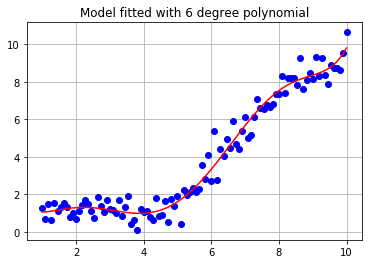

In [23]:
plt.title("Model fitted with 6 degree polynomial")
plt.grid()
plt.plot(data_x,data_y,'bo')
xlim,ylim=(plt.gca().get_xlim(),plt.gca().get_ylim())
plt.plot(data_x, X @ coeffs,'r-')
plt.xlim=xlim
plt.ylim = ylim

In [24]:
# Implement gradient computation and theta update 
def gradient_descent(X, y,theta, alpha):
    m, n = X.shape
    iter=1000
    errs = np.zeros(iters)

    for t in range(iters):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            errs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= alpha * grad
    return theta, errs

In [25]:
def h(X, theta):
    return X @ theta

In [26]:
def H(theta, X, y):
    return np.mean(np.square(h(X, theta) - y))

In [31]:
# Call stochastic gradient descent in the main loop
m,n = X.shape
LR = 0.01
sample_size = 20
epochs = 500
theta = np.zeros(n).reshape(n,1)
costs = []
for i in range(epochs): 
    idx = np.random.choice(m, sample_size, replace=False)
    x_new=X[idx]
    y_new=data_y[idx]
    y_hat= x_new @ theta - y_new
    gradient = (1/m) * x_new.T @ ((x_new@ theta) - y_new)
    theta -= LR * gradient
    costs.append(H(theta,x_new,y_new))
    print(theta,costs)

[[9.81956157e-03]
 [7.49183053e-02]
 [5.90023232e-01]
 [4.75826005e+00]
 [3.91033424e+01]
 [3.26390410e+02]
 [2.76021141e+03]] [5.787908593550596e+17]
[[-7.99510281e+05]
 [-7.19621548e+06]
 [-6.59635248e+07]
 [-6.12832844e+08]
 [-5.75188641e+09]
 [-5.44155241e+10]
 [-5.18048435e+11]] [5.787908593550596e+17, 2.543006106006527e+34]
[[3.49608561e+13]
 [2.44948107e+14]
 [1.75434146e+15]
 [1.27736630e+16]
 [9.41709607e+16]
 [7.00841390e+17]
 [5.25370353e+18]] [5.787908593550596e+17, 2.543006106006527e+34, 1.4304313816704019e+47]
[[-2.66232607e+21]
 [-2.41612222e+22]
 [-2.21766131e+23]
 [-2.05450803e+24]
 [-1.91830890e+25]
 [-1.80318907e+26]
 [-1.70487336e+27]] [5.787908593550596e+17, 2.543006106006527e+34, 1.4304313816704019e+47, 4.755334732010381e+65]
[[5.75180450e+29]
 [5.09532155e+30]
 [4.58746593e+31]
 [4.18363113e+32]
 [3.85477073e+33]
 [3.58122612e+34]
 [3.34931287e+35]] [5.787908593550596e+17, 2.543006106006527e+34, 1.4304313816704019e+47, 4.755334732010381e+65, 1.1147925230106465e+8

<ipython-input-26-111e3f87d81a>:2: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(h(X, theta) - y))
<ipython-input-25-3c47073acfdd>:2: RuntimeWarning: overflow encountered in matmul
  return X @ theta
<ipython-input-31-16a9cc9b112c>:12: RuntimeWarning: overflow encountered in matmul
  y_hat= x_new @ theta - y_new
<ipython-input-31-16a9cc9b112c>:13: RuntimeWarning: overflow encountered in matmul
  gradient = (1/m) * x_new.T @ ((x_new@ theta) - y_new)
<ipython-input-31-16a9cc9b112c>:14: RuntimeWarning: invalid value encountered in subtract
  theta -= LR * gradient


 [5.787908593550596e+17, 2.543006106006527e+34, 1.4304313816704019e+47, 4.755334732010381e+65, 1.1147925230106465e+82, 1.4991106184241063e+98, 3.0528236567256704e+114, 4.091266399493439e+129, 1.052815231839112e+147, 1.6362686661674226e+163, 3.579781661716955e+180, 1.4497353677582809e+197, 4.756559778475265e+214, 5.761429500474683e+229, 1.0125440572785503e+246, 3.419231474911564e+260, 7.585913140723444e+277, 2.4534244755478555e+294, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [ ]:
# predict y_hat using test_x and theta 
# plot x vs y in blue
# plot x vs y_hat in red